# Offshore wind farms and pipelines

- <https://data.gov.ie/dataset/marine-area-consent-wind>
- <https://data-housinggovie.opendata.arcgis.com/datasets/housinggovie::marine-area-consent-wind>
- <https://data.gov.ie/dataset/offshore-gas-pipelines>
- <https://data-housinggovie.opendata.arcgis.com/datasets/housinggovie::offshore-gas-pipelines>

In [1]:
import os
from zipfile import ZipFile

import cartopy.crs as ccrs
import contextily as cx
import geopandas as gpd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter
from matplotlib_scalebar.scalebar import ScaleBar

from h2ss import data as rd

In [2]:
# base data download directory
DATA_DIR = os.path.join("data", "wind-farms")

URL = (
    "https://opendata.arcgis.com/api/v3/datasets/"
    "803a4ecc22aa4cc09111072a0bbc4fac_3/downloads/"
    "data?format=shp&spatialRefId=4326&where=1%3D1"
)

FILE_NAME = "marine-area-consent-wind.zip"

DATA_FILE = os.path.join(DATA_DIR, FILE_NAME)

# basemap cache directory
cx.set_cache_dir(os.path.join("data", "basemaps"))

In [3]:
plt.rcParams["xtick.major.size"] = 0
plt.rcParams["ytick.major.size"] = 0
plt.rcParams["xtick.minor.size"] = 0
plt.rcParams["ytick.minor.size"] = 0

In [4]:
rd.download_data(url=URL, data_dir=DATA_DIR, file_name=FILE_NAME)

Data 'marine-area-consent-wind.zip' already exists in 'data/wind-farms'.
Data downloaded on: 2024-04-25 14:44:56.238497+00:00
Download URL: https://opendata.arcgis.com/api/v3/datasets/803a4ecc22aa4cc09111072a0bbc4fac_3/downloads/data?format=shp&spatialRefId=4326&where=1%3D1
SHA256 hash: 9ca42629e26fad8644d26aef5212e523b5dd908cb0b2c1f92a883a1d21f468f2



In [5]:
ZipFile(DATA_FILE).namelist()

['Energy_Offshore_Renewable.shp',
 'Energy_Offshore_Renewable.shx',
 'Energy_Offshore_Renewable.dbf',
 'Energy_Offshore_Renewable.cpg',
 'Energy_Offshore_Renewable.prj',
 'Energy_Offshore_Renewable.xml']

In [5]:
wind_farms = rd.read_shapefile_from_zip(data_path=DATA_FILE)

In [7]:
wind_farms.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
wind_farms.shape

(8, 14)

In [9]:
wind_farms.columns

Index(['OBJECTID', 'Shape_Leng', 'name', 'geographic', 'seaArea', 'identifier',
       'developer', 'type', 'area', 'projectDes', 'informatio', 'Shape__Are',
       'Shape__Len', 'geometry'],
      dtype='object')

In [10]:
wind_farms

,OBJECTID,Shape_Leng,name,geographic,seaArea,identifier,developer,type,area,projectDes,informatio,Shape__Are,Shape__Len,geometry
0,1,0.230937,The Oriel Windfarm,Louth,Irish Sea & St. George's Channel,2022-MAC-001,Parkwind; ESB,Fixed-Bottom,27.714408,https://www.orielwindfarm.ie/,https://www.gov.ie/pdf/?file=https://assets.go...,7.973214e+07,34210.152005,"POLYGON Z ((-6.04833 53.88694 0.00000, -6.0902..."
1,2,0.567513,Arklow Offshore Wind Farm,Wicklow,Irish Sea & St. George's Channel,2022-MAC-002,SSE Renewables,Fixed-Bottom,65.046074,https://www.sserenewables.com/offshore/project...,https://www.gov.ie/pdf/?file=https://assets.go...,1.775790e+08,97396.053723,"POLYGON Z ((-5.93413 52.91816 0.00000, -5.8972..."
2,3,0.266667,Dublin Array - Bray,Bray Bank,Irish Sea & St. George's Channel,2022-MAC-003,RWE Renewables; Saorgus Energy,Fixed-Bottom,31.001232,https://dublinarray.com/project-information/,https://www.gov.ie/pdf/?file=https://assets.go...,8.617931e+07,42098.425458,"POLYGON Z ((-5.93333 53.23333 0.00000, -5.9000..."
3,4,0.250000,Dublin Array - Kish,Kish Bank,Irish Sea & St. George's Channel,2022-MAC-004,RWE Renewables; Saorgus Energy,Fixed-Bottom,27.850465,https://dublinarray.com/project-information/,https://www.gov.ie/pdf/?file=https://assets.go...,7.770492e+07,39053.356911,"POLYGON Z ((-5.90000 53.23333 0.00000, -5.9333..."
4,5,0.976778,North Irish Sea Array,Dublin; Meath; Louth,Irish Sea & St. George's Channel,2022-MAC-005,Statkraft Ireland,Fixed-Bottom,246.423909,https://northirishseaarray.ie/,https://www.gov.ie/pdf/?file=https://assets.go...,6.999503e+08,149681.328083,"POLYGON Z ((-5.83154 53.52384 0.00000, -5.9667..."
5,6,0.362876,Codling Wind Park,Codling Bank,Irish Sea & St. George's Channel,2022-MAC-006,Fred Olsen Seawind; EDF Renewables,Fixed-Bottom,58.519791,https://codlingwindpark.ie/,https://www.gov.ie/pdf/?file=https://assets.go...,1.620132e+08,49675.425784,"POLYGON Z ((-5.71667 53.07167 0.00000, -5.8291..."
6,7,0.387108,Codling Wind Park,India Bank,Irish Sea & St. George's Channel,2022-MAC-006,Fred Olsen Seawind; EDF Renewables,Fixed-Bottom,66.643177,https://codlingwindpark.ie/,https://www.gov.ie/pdf/?file=https://assets.go...,1.838990e+08,53326.106266,"POLYGON Z ((-5.84306 53.07167 0.00000, -5.7166..."
7,8,0.264878,Sceirde Rocks Windfarm,Galway Bay,North Atlantic Ocean,2022-MAC-007,Fuinneamh Sceirde Teoranta,Fixed-Bottom,29.353818,https://www.sceirderockswindfarm.com/,https://www.gov.ie/pdf/?file=https://assets.go...,8.194668e+07,35285.774551,"POLYGON Z ((-9.96819 53.29453 0.00000, -9.9188..."


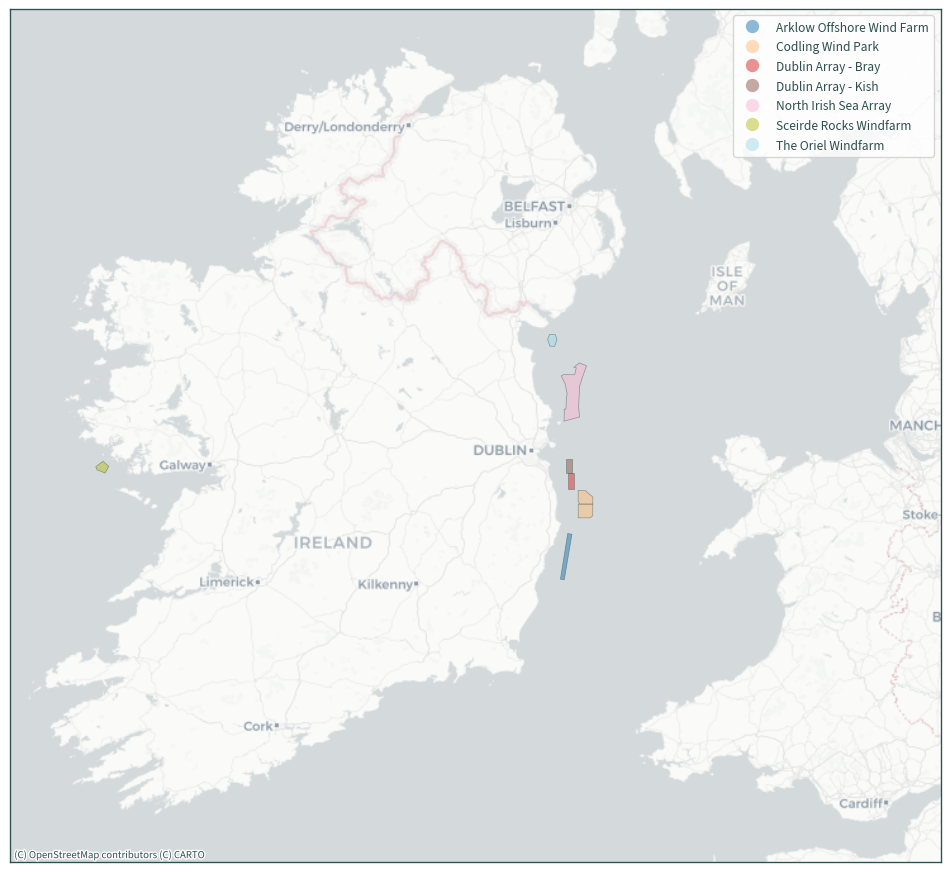

In [11]:
ax = wind_farms.to_crs(3857).plot(
    column="name",
    cmap="tab20",
    alpha=0.5,
    figsize=(10, 10),
    legend=True,
    legend_kwds={"loc": "upper right"},
    linewidth=0.5,
    edgecolor="darkslategrey",
)
plt.xlim(-1.2e6, -0.3e6)
plt.ylim(6.65e6, 7.475e6)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, zoom=7)

plt.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()

In [6]:
# keep only wind farms near the Kish Basin
wind_farms.drop(index=[0, 1, 7], inplace=True)

In [7]:
# merge wind farm polygons
wind_farms.at[2, "name"] = "Dublin Array"
wind_farms.at[3, "name"] = "Dublin Array"
wind_farms = wind_farms.dissolve(by="name")
wind_farms.reset_index(inplace=True)

In [14]:
wind_farms

,name,geometry,OBJECTID,Shape_Leng,geographic,seaArea,identifier,developer,type,area,projectDes,informatio,Shape__Are,Shape__Len
0,Codling Wind Park,"POLYGON Z ((-5.82917 53.07167 0.00000, -5.8436...",6,0.362876,Codling Bank,Irish Sea & St. George's Channel,2022-MAC-006,Fred Olsen Seawind; EDF Renewables,Fixed-Bottom,58.519791,https://codlingwindpark.ie/,https://www.gov.ie/pdf/?file=https://assets.go...,1.620132e+08,49675.425784
1,Dublin Array,"POLYGON Z ((-5.88333 53.23333 0.00000, -5.8833...",3,0.266667,Bray Bank,Irish Sea & St. George's Channel,2022-MAC-003,RWE Renewables; Saorgus Energy,Fixed-Bottom,31.001232,https://dublinarray.com/project-information/,https://www.gov.ie/pdf/?file=https://assets.go...,8.617931e+07,42098.425458
2,North Irish Sea Array,"POLYGON Z ((-5.83154 53.52384 0.00000, -5.9667...",5,0.976778,Dublin; Meath; Louth,Irish Sea & St. George's Channel,2022-MAC-005,Statkraft Ireland,Fixed-Bottom,246.423909,https://northirishseaarray.ie/,https://www.gov.ie/pdf/?file=https://assets.go...,6.999503e+08,149681.328083


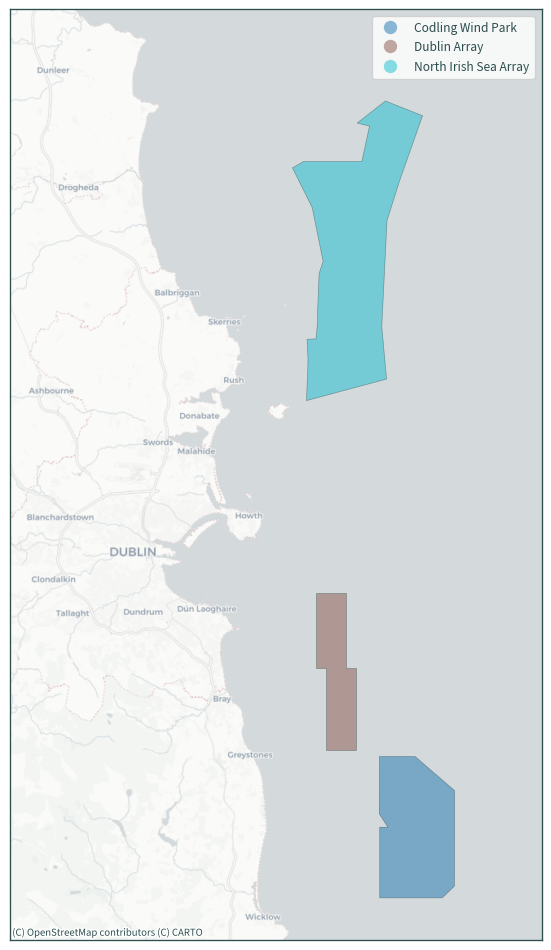

In [25]:
ax = wind_farms.to_crs(3857).plot(
    column="name",
    alpha=0.5,
    figsize=(10, 10),
    legend=True,
    legend_kwds={"loc": "upper right"},
    linewidth=0.5,
    edgecolor="darkslategrey",
)
plt.xlim(-0.72e6, -0.62e6)
plt.ylim(6.975e6, 7.15e6)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

plt.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()

In [8]:
# read Kish Basin data
DATA_DIR = os.path.join("data", "kish-basin")

ds, extent = rd.read_dat_file(dat_path=DATA_DIR)

# use extent bounds
xmin, ymin, xmax, ymax = extent.total_bounds

In [9]:
# shape of the halite
shape = rd.halite_shape(dat_xr=ds)

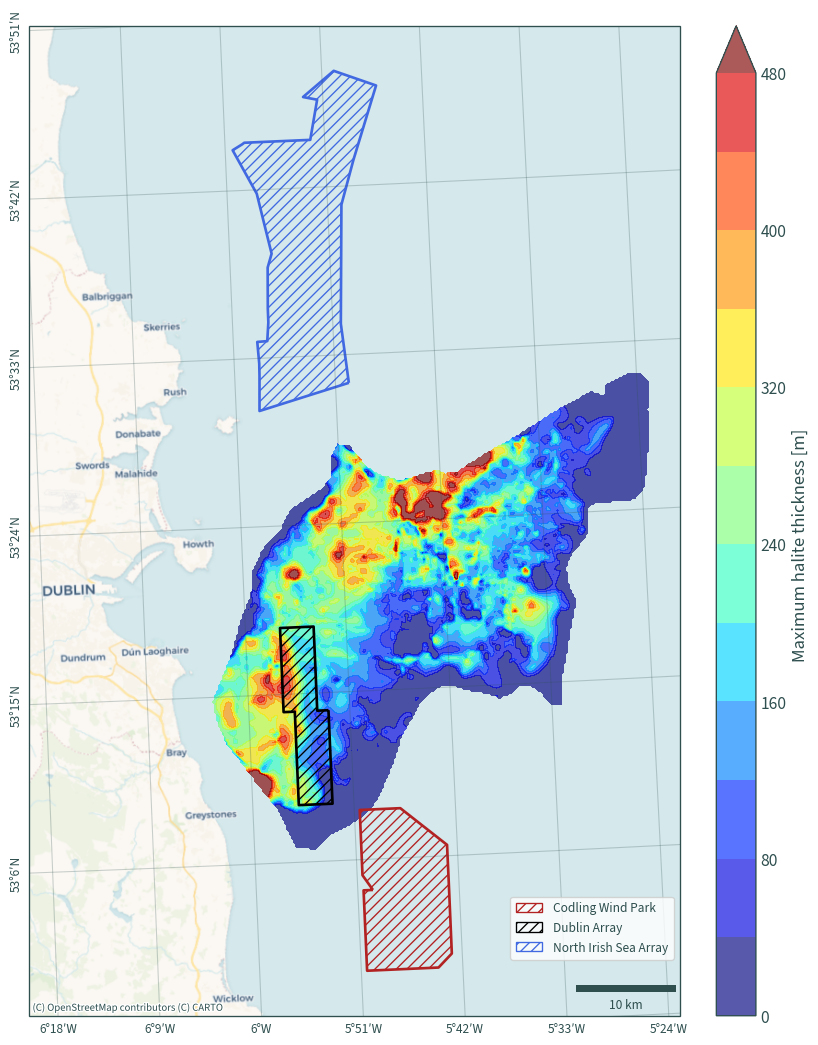

In [39]:
plt.figure(figsize=(11, 11))
ax = plt.axes(projection=ccrs.epsg(rd.CRS))

ds.max(dim="halite")["Thickness"].plot.contourf(
    cmap="jet",
    alpha=0.65,
    robust=True,
    levels=15,
    cbar_kwargs={
        "label": "Maximum halite thickness [m]",
        "aspect": 25,
        "pad": 0.035,
    },
)

plt.xlim(xmin - 8550, xmax + 1000)
# plt.ylim(ymin - 10500, ymax + 10500)

# wind farms
colours = ["firebrick", "black", "royalblue"]
legend_handles = []
for index, colour in zip(range(len(wind_farms)), colours):
    wind_farms.iloc[[index]].to_crs(rd.CRS).to_crs(rd.CRS).plot(
        ax=ax, hatch="///", facecolor="none", linewidth=2, edgecolor=colour
    )
    legend_handles.append(
        mpatches.Patch(
            facecolor="none",
            hatch="///",
            edgecolor=colour,
            label=wind_farms.iloc[[index]]["name"].values[0],
        )
    )

cx.add_basemap(ax, crs=rd.CRS, source=cx.providers.CartoDB.Voyager)
ax.gridlines(
    draw_labels={"bottom": "x", "left": "y"},
    alpha=0.25,
    color="darkslategrey",
    xformatter=LongitudeFormatter(auto_hide=False, dms=True),
    yformatter=LatitudeFormatter(auto_hide=False, dms=True),
    ylabel_style={"rotation": 90},
)
ax.add_artist(
    ScaleBar(
        1,
        box_alpha=0,
        location="lower right",
        color="darkslategrey",
        width_fraction=0.0075,
    )
)
ax.legend(handles=legend_handles, loc="lower right", bbox_to_anchor=(1, 0.05))

plt.title(None)
plt.tight_layout()

# plt.savefig(
#     os.path.join("graphics", "fig_offshore_wind_farms.jpg"),
#     format="jpg",
#     dpi=600,
# )
plt.show()

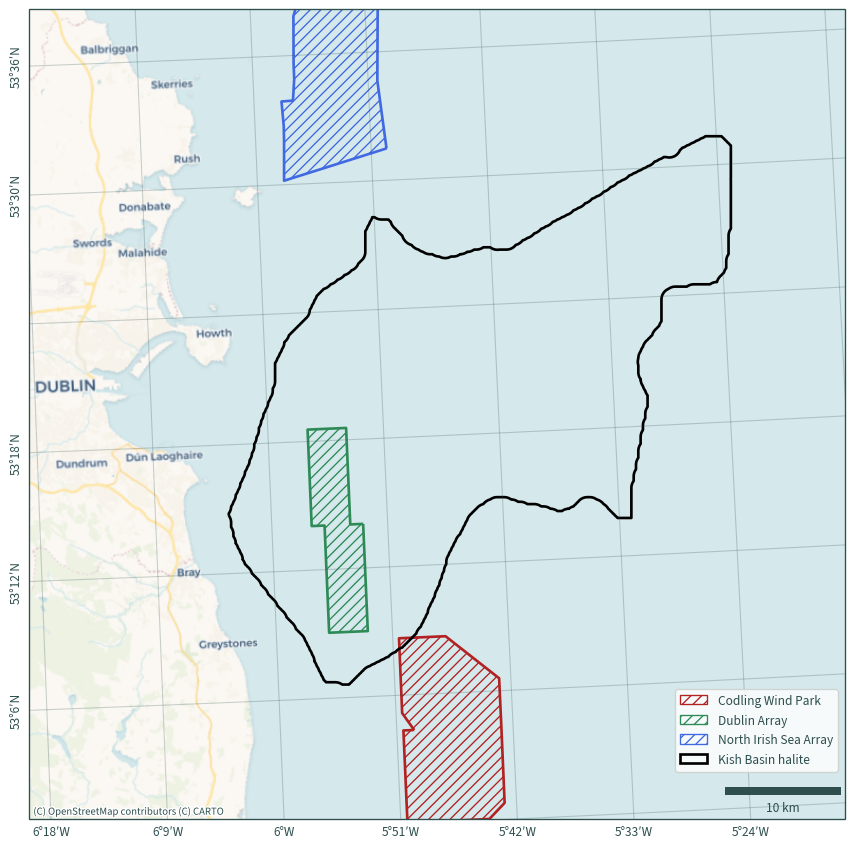

In [30]:
plt.figure(figsize=(9, 9))
ax = plt.axes(projection=ccrs.epsg(rd.CRS))

# add halite boundary - use buffering to smooth the outline
shape.buffer(1000).buffer(-1000).boundary.plot(
    ax=ax, color="black", linewidth=2
)

plt.xlim(xmin - 7750, xmax + 7750)
plt.ylim(ymin - 10500, ymax + 10500)

# wind farms
colours = ["firebrick", "seagreen", "royalblue"]
legend_handles = []
for index, colour in zip(range(len(wind_farms)), colours):
    wind_farms.iloc[[index]].to_crs(rd.CRS).to_crs(rd.CRS).plot(
        ax=ax, hatch="///", facecolor="none", linewidth=2, edgecolor=colour
    )
    legend_handles.append(
        mpatches.Patch(
            facecolor="none",
            hatch="///",
            edgecolor=colour,
            label=wind_farms.iloc[[index]]["name"].values[0],
        )
    )

legend_handles.append(
    mpatches.Patch(
        facecolor="none",
        edgecolor="black",
        label="Kish Basin halite",
        linewidth=2,
    )
)

cx.add_basemap(ax, crs=rd.CRS, source=cx.providers.CartoDB.Voyager, zoom=10)
ax.gridlines(
    draw_labels={"bottom": "x", "left": "y"},
    alpha=0.25,
    color="darkslategrey",
    xformatter=LongitudeFormatter(auto_hide=False, dms=True),
    yformatter=LatitudeFormatter(auto_hide=False, dms=True),
    ylabel_style={"rotation": 90},
)
ax.add_artist(
    ScaleBar(1, box_alpha=0, location="lower right", color="darkslategrey")
)
ax.legend(handles=legend_handles, loc="lower right", bbox_to_anchor=(1, 0.05))

plt.title(None)
plt.tight_layout()
plt.show()

In [10]:
# distance from Kish Bank
wind_farms_ = wind_farms.to_crs(rd.CRS)

for i in range(len(wind_farms_)):
    print(
        wind_farms_.iloc[[i]]["name"].values[0],
        "is",
        f"{wind_farms_.iloc[[i]].distance(shape['geometry'], align=False).values[0]:,.2f}",
        "m away from Kish Bank",
    )

Codling Wind Park is 0.00 m away from Kish Bank
Dublin Array is 0.00 m away from Kish Bank
North Irish Sea Array is 5,300.63 m away from Kish Bank


## Distance from pipelines

In [11]:
DATA_DIR = os.path.join("data", "pipelines")

URL = (
    "https://opendata.arcgis.com/api/v3/datasets/"
    "dc6e3849b9fc43bb93078c5d0093bf6a_1/downloads/data?"
    "format=shp&spatialRefId=4326&where=1%3D1"
)

FILE_NAME = "pipelines.zip"

DATA_FILE = os.path.join(DATA_DIR, FILE_NAME)

rd.download_data(url=URL, data_dir=DATA_DIR, file_name=FILE_NAME)

SHA256 hash of downloaded file: 68ddb98ed5791e9e614a2fc51de13234ecfc306170585d09ef745e7f45346940
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


Data downloaded on: 2024-04-27 21:25:25.217238+00:00


In [12]:
ZipFile(DATA_FILE).namelist()

['Energy_-_Petroleum.dbf',
 'Energy_-_Petroleum.shx',
 'Energy_-_Petroleum.cpg',
 'Energy_-_Petroleum.shp',
 'Energy_-_Petroleum.prj',
 'Energy_-_Petroleum.xml']

In [13]:
pipelines = rd.read_shapefile_from_zip(data_path=DATA_FILE)

In [15]:
pipelines.head()

,OBJECTID,Policy02_P,Policy02_C,Map_Data_S,Map_name,NMPF_Chapt,NMPF_Cha_1,Policy01_C,Policy01_P,OPERATOR,FROM_LOC,MI_Map_num,Map_Featur,Policy01_N,Policy02_N,Owning_Org,Metadata_L,Last_Updat,Shape__Len,geometry
0,1,S,PET2,Offshore_Pipelines_of_Ireland_Polylines,Oil and Gas Activity and Authorisations,Energy and Petroleum,14,PET1,P,None,None,13,Offshore Gas Pipelines,Petroleum Policy 1,Petroleum Policy 2,EMODnet,https://www.emodnet-humanactivities.eu/search-...,2023,19179.529136,"LINESTRING (-5.87186 35.99551, -5.87104 35.997..."
1,2,S,PET2,Offshore_Pipelines_of_Ireland_Polylines,Oil and Gas Activity and Authorisations,Energy and Petroleum,14,PET1,P,None,None,13,Offshore Gas Pipelines,Petroleum Policy 1,Petroleum Policy 2,EMODnet,https://www.emodnet-humanactivities.eu/search-...,2023,110216.070871,"MULTILINESTRING ((-6.91260 36.96955, -6.91130 ..."
2,3,S,PET2,Offshore_Pipelines_of_Ireland_Polylines,Oil and Gas Activity and Authorisations,Energy and Petroleum,14,PET1,P,None,Kinsale,13,Offshore Gas Pipelines,Petroleum Policy 1,Petroleum Policy 2,EMODnet,https://www.emodnet-humanactivities.eu/search-...,2023,5701.804975,"LINESTRING (-8.18620 51.79340, -8.17288 51.815..."
3,4,S,PET2,Offshore_Pipelines_of_Ireland_Polylines,Oil and Gas Activity and Authorisations,Energy and Petroleum,14,PET1,P,None,Kinsale,13,Offshore Gas Pipelines,Petroleum Policy 1,Petroleum Policy 2,EMODnet,https://www.emodnet-humanactivities.eu/search-...,2023,8010.953518,"LINESTRING (-8.01696 51.36072, -8.01632 51.360..."
4,5,S,PET2,Offshore_Pipelines_of_Ireland_Polylines,Oil and Gas Activity and Authorisations,Energy and Petroleum,14,PET1,P,None,Kinsale,13,Offshore Gas Pipelines,Petroleum Policy 1,Petroleum Policy 2,EMODnet,https://www.emodnet-humanactivities.eu/search-...,2023,10038.745430,"LINESTRING (-8.18620 51.79340, -8.22569 51.74323)"


In [19]:
pipelines.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

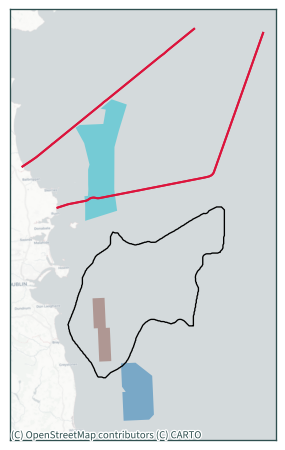

In [39]:
ax = pipelines.to_crs(rd.CRS).overlay(gpd.GeoDataFrame(geometry=shape.buffer(50000))).plot(color="crimson")
shape.buffer(1000).buffer(-1000).boundary.plot(
    ax=ax, color="black", linewidth=1
)
wind_farms_.plot(ax=ax, alpha=.5, column="name")
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs=rd.CRS)

plt.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()

In [60]:
for i in range(len(wind_farms_)):
    print(
        wind_farms_.iloc[[i]]["name"].values[0],
        "is",
        f"{wind_farms_.iloc[[i]].distance(pipelines.to_crs(rd.CRS).overlay(gpd.GeoDataFrame(geometry=shape.buffer(25000))).dissolve()['geometry'], align=False).values[0]:,.2f}",
        "m away from the nearest pipeline",
    )

Codling Wind Park is 46,160.36 m away from the nearest pipeline
Dublin Array is 26,922.53 m away from the nearest pipeline
North Irish Sea Array is 0.00 m away from the nearest pipeline


In [61]:
print(
    "Kish Basin is",
    f"{shape.distance(pipelines.to_crs(rd.CRS).overlay(gpd.GeoDataFrame(geometry=shape.buffer(25000))).dissolve()['geometry'], align=False).values[0]:,.2f}",
    "m away from the nearest pipeline",
)

Kish Basin is 8,710.08 m away from the nearest pipeline
